In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shah-rukh-khan-tweets/srk_tweets.csv


# Libraries

In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

/kaggle/input/shah-rukh-khan-tweets/srk_tweets.csv


# Load Dataset

In [3]:
url='/kaggle/input/shah-rukh-khan-tweets/srk_tweets.csv'
df=pd.read_csv(url)
df.head()


,num,id,url,tweet,date,retweets,likes,mentions,hashtags
0,1,1.560000e+18,https://twitter.com/iamsrk/status/156268139485...,Locked &amp; loaded. Meet @TheJohnAbraham in #...,2022-08-25 06:00:52+00:00,6976,46524,"[User(username='TheJohnAbraham', id=947192262,...","['Pathaan', 'Pathaan', 'YRF50', 'SiddharthAnan..."
1,2,1.560000e+18,https://twitter.com/iamsrk/status/156267388091...,He’s tough and plays it rough! Presenting @The...,2022-08-25 05:31:00+00:00,6203,29311,"[User(username='TheJohnAbraham', id=947192262,...","['Pathaan', 'Pathaan', 'YRF50', 'SiddharthAnan..."
2,3,1.560000e+18,https://twitter.com/iamsrk/status/155881637840...,Teaching the young ones at home the essence an...,2022-08-14 14:02:40+00:00,14334,112343,NaN,NaN
3,4,1.560000e+18,https://twitter.com/iamsrk/status/155553938316...,Been working the last few days non stop….so ne...,2022-08-05 13:01:04+00:00,4857,37383,NaN,['DARLINGS']
4,5,1.550000e+18,https://twitter.com/iamsrk/status/155191378820...,Lil one I am also so anxious that u shared the...,2022-07-26 12:54:14+00:00,3876,27351,NaN,NaN


# Description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56890 entries, 0 to 56889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num       56890 non-null  int64  
 1   id        56890 non-null  float64
 2   url       56890 non-null  object 
 3   tweet     56890 non-null  object 
 4   date      56890 non-null  object 
 5   retweets  56890 non-null  int64  
 6   likes     56890 non-null  int64  
 7   mentions  38124 non-null  object 
 8   hashtags  552 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.9+ MB


In [5]:
df.describe()

,num,id,retweets,likes
count,56890.000000,5.689000e+04,56890.000000,56890.000000
mean,28445.500000,6.256721e+17,278.540745,1140.743312
std,16422.872744,1.799950e+17,1154.064619,6499.156803
min,1.000000,7.309887e+09,0.000000,0.000000
25%,14223.250000,6.640000e+17,0.000000,0.000000
50%,28445.500000,6.640000e+17,1.000000,1.000000
75%,42667.750000,6.640000e+17,7.000000,13.000000
max,56890.000000,1.560000e+18,127019.000000,349741.000000


# Most Used Words in Tweets

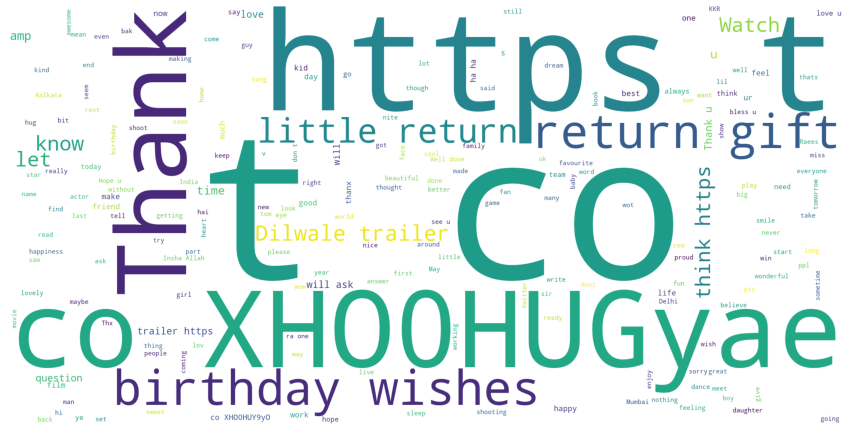

In [6]:
corpus = ' '.join(df['tweet'])
corpus = corpus.replace('.', '. ')
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2000,height=1000).generate(corpus)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Tweets by month and by day

In [7]:
df2 = df
df2['dated'] = df2['date'].map(lambda x: x.split(' ')[0])
df2['time'] = df2['date'].map(lambda x: x.split(' ')[-1])
del df2['date']
df2.head()

,num,id,url,tweet,retweets,likes,mentions,hashtags,dated,time
0,1,1.560000e+18,https://twitter.com/iamsrk/status/156268139485...,Locked &amp; loaded. Meet @TheJohnAbraham in #...,6976,46524,"[User(username='TheJohnAbraham', id=947192262,...","['Pathaan', 'Pathaan', 'YRF50', 'SiddharthAnan...",2022-08-25,06:00:52+00:00
1,2,1.560000e+18,https://twitter.com/iamsrk/status/156267388091...,He’s tough and plays it rough! Presenting @The...,6203,29311,"[User(username='TheJohnAbraham', id=947192262,...","['Pathaan', 'Pathaan', 'YRF50', 'SiddharthAnan...",2022-08-25,05:31:00+00:00
2,3,1.560000e+18,https://twitter.com/iamsrk/status/155881637840...,Teaching the young ones at home the essence an...,14334,112343,NaN,NaN,2022-08-14,14:02:40+00:00
3,4,1.560000e+18,https://twitter.com/iamsrk/status/155553938316...,Been working the last few days non stop….so ne...,4857,37383,NaN,['DARLINGS'],2022-08-05,13:01:04+00:00
4,5,1.550000e+18,https://twitter.com/iamsrk/status/155191378820...,Lil one I am also so anxious that u shared the...,3876,27351,NaN,NaN,2022-07-26,12:54:14+00:00


In [8]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df2= df[['id','dated','time','tweet','retweets']]
df2.head()

,id,dated,time,tweet,retweets
0,1.560000e+18,2022-08-25,06:00:52+00:00,Locked &amp; loaded. Meet @TheJohnAbraham in #...,6976
1,1.560000e+18,2022-08-25,05:31:00+00:00,He’s tough and plays it rough! Presenting @The...,6203
2,1.560000e+18,2022-08-14,14:02:40+00:00,Teaching the young ones at home the essence an...,14334
3,1.560000e+18,2022-08-05,13:01:04+00:00,Been working the last few days non stop….so ne...,4857
4,1.550000e+18,2022-07-26,12:54:14+00:00,Lil one I am also so anxious that u shared the...,3876


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56890 entries, 0 to 56889
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        56890 non-null  float64
 1   dated     56890 non-null  object 
 2   time      56890 non-null  object 
 3   tweet     56890 non-null  object 
 4   retweets  56890 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.2+ MB


In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

In [11]:
df2['month'] = df2['dated'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])
month_df = pd.DataFrame(df2['month'].value_counts()).reset_index()
month_df.columns = ['month', 'tweet']

<AxesSubplot:title={'center':'All Tweets Per Month'}, xlabel='month', ylabel='tweet'>

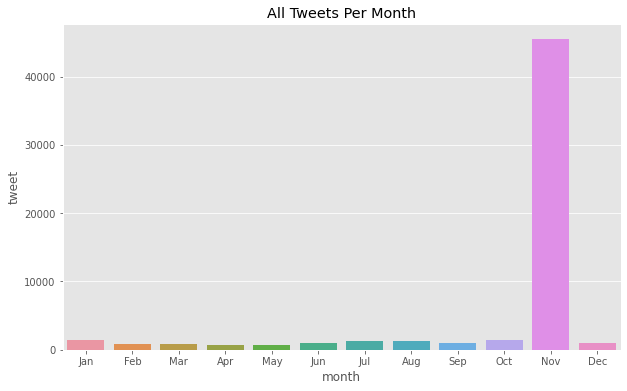

In [12]:
plt.figure(figsize=(10,6))
plt.title("All Tweets Per Month")
sns.barplot(x='month', y='tweet', data=month_df, order=month_order)

In [13]:
import datetime

<AxesSubplot:title={'center':'All Tweets Per Day'}, xlabel='day', ylabel='tweet'>

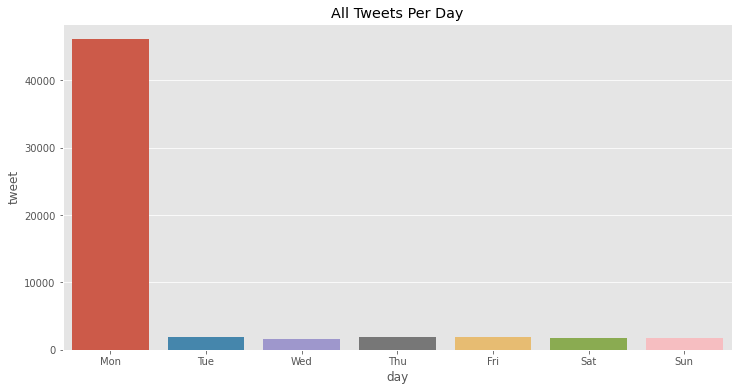

In [14]:
def getday(x):
    year, month, day = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]
df['day'] = df['dated'].apply(getday)
day_df = pd.DataFrame(df['day'].value_counts()).reset_index()
day_df.columns = ['day', 'tweet']
plt.figure(figsize=(12,6))
plt.title("All Tweets Per Day")
sns.barplot(x='day', y='tweet', data=day_df, order=day_order)

# Top Tagged Users

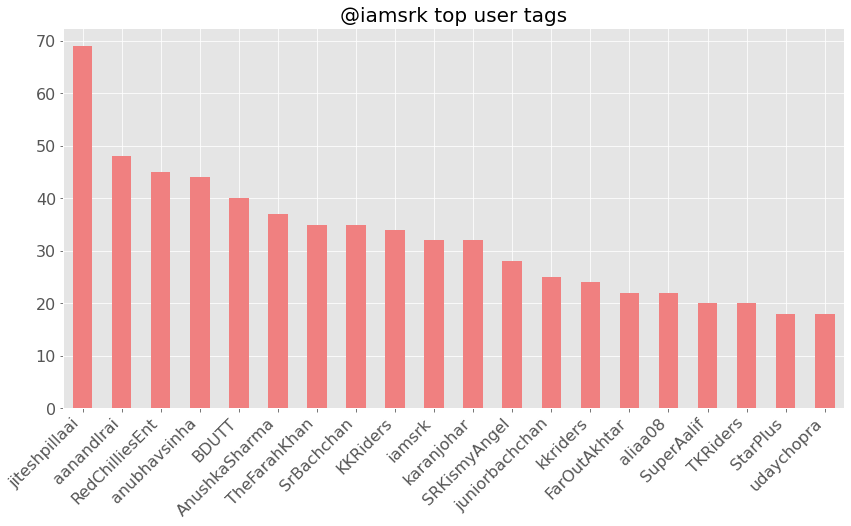

In [15]:
import itertools

c = list(
itertools.chain(
    *df.tweet.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16, color='lightcoral'
)
plt.gca().set_title('@iamsrk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
pass